In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import statistics
from statistics import mean
from mpl_toolkits import mplot3d

%matplotlib inline

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
ccCustomersCSv = pd.read_csv('Resources/BankChurners.csv')

In [4]:
ccCustomersCSv

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [5]:
ccCustomersCSv['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [6]:
# some rows have the value 'Unknown' in the income category column, filtering those out
filtered_df = ccCustomersCSv[ccCustomersCSv['Income_Category'].str.contains('Unknown')== False]

In [7]:
# Change the values in the Income Category column to numerical values, we picked the value that fell between specified range
filtered_df.loc[filtered_df['Income_Category']== '$60K - $80K', 'Income_Category'] = 70000
filtered_df.loc[filtered_df['Income_Category']== 'Less than $40K', 'Income_Category'] = 20000
filtered_df.loc[filtered_df['Income_Category']== '$80K - $120K', 'Income_Category'] = 100000
filtered_df.loc[filtered_df['Income_Category']== '$40K - $60K', 'Income_Category'] = 50000
filtered_df.loc[filtered_df['Income_Category']== '$120K +', 'Income_Category'] = 120000

In [8]:
filtered_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,70000,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,20000,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,100000,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,20000,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,70000,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,50000,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,50000,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,20000,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,50000,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [9]:
filtered_df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis=1, inplace=True)


/var/folders/2w/fy2bjdfs7nz5_675nfk08_jh0000gp/T/ipykernel_38374/2070008462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',


In [10]:
# display basic info about ccCustomersCSv
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9015 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 9015 non-null   int64  
 1   Attrition_Flag            9015 non-null   object 
 2   Customer_Age              9015 non-null   int64  
 3   Gender                    9015 non-null   object 
 4   Dependent_count           9015 non-null   int64  
 5   Education_Level           9015 non-null   object 
 6   Marital_Status            9015 non-null   object 
 7   Income_Category           9015 non-null   object 
 8   Card_Category             9015 non-null   object 
 9   Months_on_book            9015 non-null   int64  
 10  Total_Relationship_Count  9015 non-null   int64  
 11  Months_Inactive_12_mon    9015 non-null   int64  
 12  Contacts_Count_12_mon     9015 non-null   int64  
 13  Credit_Limit              9015 non-null   float64
 14  Total_R

In [11]:
creditLimit = filtered_df['Credit_Limit']
avg_Utilization_Ratio = filtered_df['Avg_Utilization_Ratio']

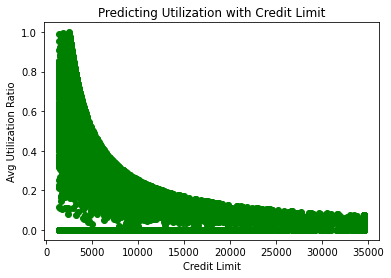

In [12]:
figure1, figure1_axes = plt.subplots()
figure1_axes.plot(creditLimit, avg_Utilization_Ratio, 'go',)
figure1_axes.set_xlabel('Credit Limit')
figure1_axes.set_ylabel('Avg Utilization Ratio')
figure1_axes.set_title('Predicting Utilization with Credit Limit');

In [13]:
creditLimit = filtered_df['Credit_Limit']
income = filtered_df['Income_Category']

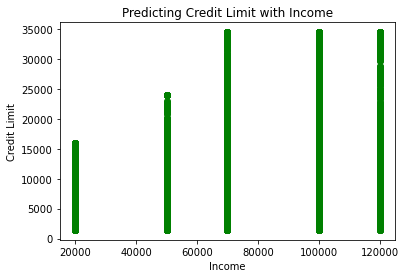

In [14]:
figure1, figure1_axes = plt.subplots()
figure1_axes.plot(income, creditLimit, 'go',)
figure1_axes.set_xlabel('Income')
figure1_axes.set_ylabel('Credit Limit')
figure1_axes.set_title('Predicting Credit Limit with Income');

In [15]:
filtered_df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [16]:
filtered_df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [17]:
filtered_df.loc[filtered_df['Attrition_Flag'] == 'Existing Customer', 'Attrition_Flag'] = 0.1
filtered_df.loc[filtered_df['Attrition_Flag'] == 'Attrited Customer', 'Attrition_Flag'] = 0.2

In [18]:
filtered_df.loc[filtered_df['Education_Level']== 'High School', 'Education_Level'] = 0.50
filtered_df.loc[filtered_df['Education_Level']== 'Graduate', 'Education_Level'] = 0.70
filtered_df.loc[filtered_df['Education_Level']== 'Uneducated', 'Education_Level'] = 0.25
filtered_df.loc[filtered_df['Education_Level']== 'College', 'Education_Level'] = 0.60
filtered_df.loc[filtered_df['Education_Level']== 'Post-Graduate', 'Education_Level'] = 0.80
filtered_df.loc[filtered_df['Education_Level']== 'Doctorate', 'Education_Level'] = 0.90
filtered_df.loc[filtered_df['Education_Level']== 'Unknown', 'Education_Level'] = 0.25

In [19]:
filtered_df.loc[filtered_df['Marital_Status']== 'Married', 'Marital_Status'] = 0.90
filtered_df.loc[filtered_df['Marital_Status']== 'Single', 'Marital_Status'] = 0.80
filtered_df.loc[filtered_df['Marital_Status']== 'Divorced', 'Marital_Status'] = 0.70
filtered_df.loc[filtered_df['Marital_Status']== 'Unknown', 'Marital_Status'] = 0.80

In [23]:
filtered_df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [24]:
filtered_df.loc[filtered_df['Card_Category']== 'Blue', 'Card_Category'] = 0.1
filtered_df.loc[filtered_df['Card_Category']== 'Gold', 'Card_Category'] = 0.3
filtered_df.loc[filtered_df['Card_Category']== 'Silver', 'Card_Category'] = 0.2
filtered_df.loc[filtered_df['Card_Category']== 'Platinum', 'Card_Category'] = 0.4

In [25]:
filtered_df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [26]:
filtered_df.loc[filtered_df['Gender']== 'M', 'Gender'] = 0.1
filtered_df.loc[filtered_df['Gender']== 'F', 'Gender'] = 0.2

In [27]:
filtered_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0.1,45,0.1,3,0.5,0.9,70000,0.1,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0.1,49,0.2,5,0.7,0.8,20000,0.1,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0.1,51,0.1,3,0.7,0.9,100000,0.1,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0.1,40,0.2,4,0.5,0.8,20000,0.1,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0.1,40,0.1,3,0.25,0.9,70000,0.1,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0.1,50,0.1,2,0.7,0.8,50000,0.1,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,0.2,41,0.1,2,0.25,0.7,50000,0.1,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,0.2,44,0.2,1,0.5,0.9,20000,0.1,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,0.2,30,0.1,2,0.7,0.8,50000,0.1,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [28]:
filtered_df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Text(0, 0.5, 'Credit_Limit')

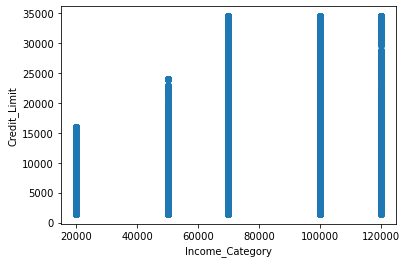

In [41]:
plt.scatter(filtered_df['Income_Category'], filtered_df['Credit_Limit'])
plt.xlabel("Income_Category")
plt.ylabel("Credit_Limit")
### END SOLUTION

Text(0, 0.5, 'Credit_Limit')

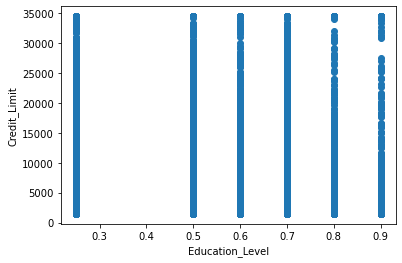

In [40]:
plt.scatter(filtered_df['Education_Level'], filtered_df['Credit_Limit'])
plt.xlabel("Education_Level")
plt.ylabel("Credit_Limit")
### END SOLUTION

Text(0, 0.5, 'Credit_Limit')

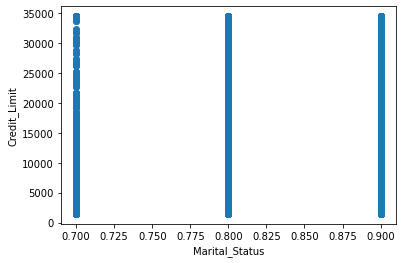

In [42]:
plt.scatter(filtered_df['Marital_Status'], filtered_df['Credit_Limit'])
plt.xlabel("Marital_Status")
plt.ylabel("Credit_Limit")
### END SOLUTION

In [ ]:
plt.scatter(filtered_df['mon'], filtered_df['Credit_Limit'])
plt.xlabel("Education_Level")
plt.ylabel("Credit_Limit")
### END SOLUTION

Text(0, 0.5, 'Credit_Limit')

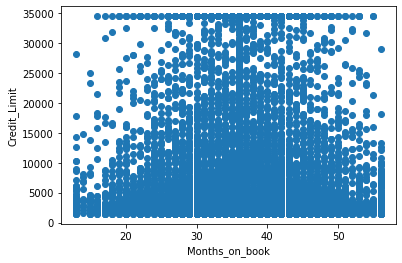

In [43]:
plt.scatter(filtered_df['Months_on_book'], filtered_df['Credit_Limit'])
plt.xlabel("Months_on_book")
plt.ylabel("Credit_Limit")
### END SOLUTION

In [29]:
X = filtered_df.drop('Credit_Limit', axis=1)
y = filtered_df['Credit_Limit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [35]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


mean squared error (MSE): 9.519043269157687e-21
R-squared (R2): 1.0


In [37]:
model.score(X_test, y_test)

1.0